<a href="https://colab.research.google.com/github/Fernanda101704/Redes_Neurais_2021/blob/main/Projeto_2_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [262]:
# Projeto 2: Disciplina de Redes Neurais - UFU
# Tema: Processamento de imagens ANN
# Professor: Ubirajara Coutinho Filho
# Aluna: Fernanda Silva Pimenta
# Data: 07/07/2021


In [263]:
# Inicialmente é necessário definir as bibliotecas que serão utilizadas para a execução do código:
from matplotlib import pyplot as plt
# matplotlib.pyplot é a biblioteca usada para fazer gráficos no Phyton e permite fazer as configurações do gráfico, como cor, formato, etc
from sklearn.svm import SVC
# sklearn.svm é uma biblioteca de Support Vector Machine que permite ajuste e seleção de modelos
from sklearn import preprocessing
# preprocessing é uma função de pré-processamento para qualquer dataset, a biblioteca que armazena essa função é a sklearn
from sklearn.model_selection import train_test_split
# train_test_split é uma função da biblioteca sklearn.model_selection utilizada para fazer a separação dos dados em treino e teste
from sklearn.metrics import classification_report
# classification_report é uma função da biblioteca sklearn.metrics utilizada para gerar relatórios de classificação
import numpy as np
# numpy é a biblioteca numérica do Phyton e no código ela é denominada de np
import pandas as pd
# pandas é a biblioteca responsável pela manipulação de arquivos e no código ela é denominada de pd
import cv2
# significa computer vision - é a biblioteca que trabalha processando imagens em uma ANN
import random
# É uma biblioteca de funções que tem geradores de números pseudoaleatórios
import zipfile
# biblioteca que permite usar ferramentas para criar, ler, adicionar e listar um arquivo ZIP
from keras.models import Sequential
# Sequential é uma função da biblioteca keras.models que permite criar uma lista simples de camadas de entrada única e saída única 
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
# A biblioteca keras.layers é voltada a linguagens de aprendizagem profundas (deep learning), nesse caso, ela está realizando


In [264]:
print("Essa rede neural utiliza um banco de dados de flores do site Kaggle")
print ("O link para acessar as fotos é: https://www.kaggle.com/olgabelitskaya/flower-color-images")

Essa rede neural utiliza um banco de dados de flores do site Kaggle
O link para acessar as fotos é: https://www.kaggle.com/olgabelitskaya/flower-color-images


In [265]:
!git clone https://github.com/Fernanda101704/Redes_Neurais_2021
%cd Redes_Neurais_2021
# Esse comando é usado para criar uma cópia de um repositório ou parte específica dentro de um repositório, nesse caso foi criado uma cópia da pasta Redes_Neurais_2021

Cloning into 'Redes_Neurais_2021'...
remote: Enumerating objects: 130, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 130 (delta 53), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (130/130), 32.12 MiB | 25.22 MiB/s, done.
Resolving deltas: 100% (53/53), done.
/content/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021


In [266]:
# A lista "Flores" abaixo apresenta 3 zips diferentes com as flores margaridas, orquídeas e cravos. 
Flores =['Margaridas.zip','Orquídeas.zip','Cravo.zip']

flor_name=[]
# lista para armazenar o nome das imagens (vazia)
x_cinza=[]
# lista usada para armazenar as imagens em escalas de cinza (vazia)
x_original = []
# lista usada para armazenar as imagens originais (vazia)
for FILE in Flores:
  file_name = zipfile.ZipFile(FILE, 'r')
  # Comando utilizado para ler (read) o arquivo zip
  file_name.extractall()
  # Comando utilizado para extrair os arquivos do zip
  with zipfile.ZipFile(FILE, "r") as f:
      for name in f.namelist():
          flor_name.append(name)
# o comando append é utilizado para registrar os nomes 

In [267]:
print(img_name)

['Margarida (11).png', 'Margarida (22).png', 'Margarida (33).png', 'Margarida (34).png', 'Margarida (35).png', 'Margarida (36).png', 'Margarida (45).png', 'Margarida (46).png', 'Margarida (47).png', 'Margarida (56).png', 'Margarida (57).png', 'Margarida (58).png', 'Margarida (59).png', 'Margarida (60).png', 'Margarida (61).png', 'Margarida (62).png', 'Margarida (63).png', 'Margarida (64).png', 'Margarida (65).png', 'Margarida (66).png', 'Margarida (67).png', 'Margarida (68).png', 'Margarida (69).png', 'Margarida (70).png', 'Margarida (71).png', 'Margarida (72).png', 'Margarida (73).png', 'Margarida (74).png', 'Margarida (75).png', 'Margarida (76).png', 'Margarida (77).png', 'Margarida (78).png', 'Margarida (79).png', 'Margarida (80).png', 'Margarida (81).png', 'Margarida (82).png', 'Margarida (83).png', 'Margarida (84).png', 'Margarida (85).png', 'Margarida (86).png', 'Margarida (87).png', 'Margarida (88).png', 'Margarida (99).png', 'Orquidea (1).png', 'Orquidea (2).png', 'Orquidea (3)

In [268]:
y_names = []
for yy in img_name:
  name = yy[0]+yy[1]+yy[2]
  y_names.append(name)

In [269]:
unique_list = []    
for yy in y_names:
  if yy not in unique_list:
    unique_list.append(yy)

In [270]:
print(unique_list)

['Mar', 'Orq', 'cra']


In [271]:
n = len(unique_list)
y = []
for yy in y_names:
  for i in range(n):
    if(yy == unique_list[i]):
      y.append(i)

In [272]:
DATASET_SIZE = len(y_names)
Ind = range(DATASET_SIZE)
Img_Size = 80
num_range = DATASET_SIZE

In [273]:
Ind_train, Ind_test= train_test_split(Ind,test_size=0.20, shuffle=True, random_state=3)

In [274]:
X_train = []
Y_train = []
for II in Ind_train:
  name = img_name[II]
  X_train.append(cv2.resize(cv2.imread(name),(Img_Size,Img_Size)))
  # X_train.append(cv2.imread(name))
  Y_train.append(y[II])

In [275]:
X_test= []
Y_test = []
i =0
for II in Ind_test:
  name = img_name[II]
  #X_test.append(cv2.imread(name))
  X_test.append(cv2.resize(cv2.imread(name),(Img_Size,Img_Size)))
  Y_test.append(y[II])

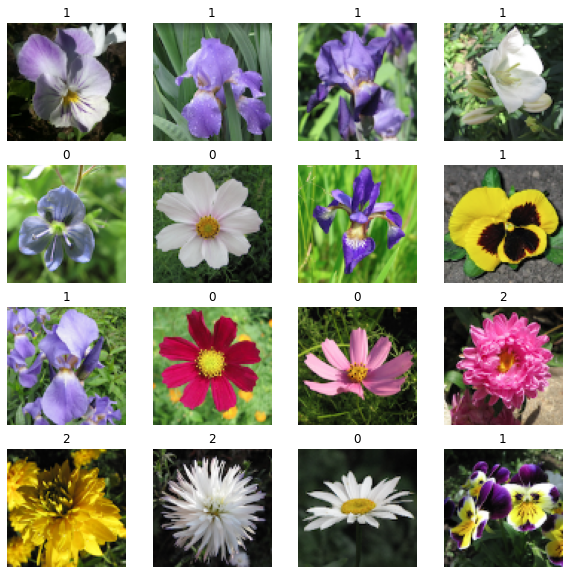

In [276]:
# view some images from the train_ds
# num,cols,dim = np.array(X_train[0]).shape
num = len(Y_train)
plt.figure(figsize=(10, 10))
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  kk = int(random.randrange(num))
  RGB_img = cv2.cvtColor(X_train[kk], cv2.COLOR_BGR2RGB)
  plt.imshow(RGB_img)
  plt.title(Y_train[kk])
  plt.axis("off")

In [277]:
num

106

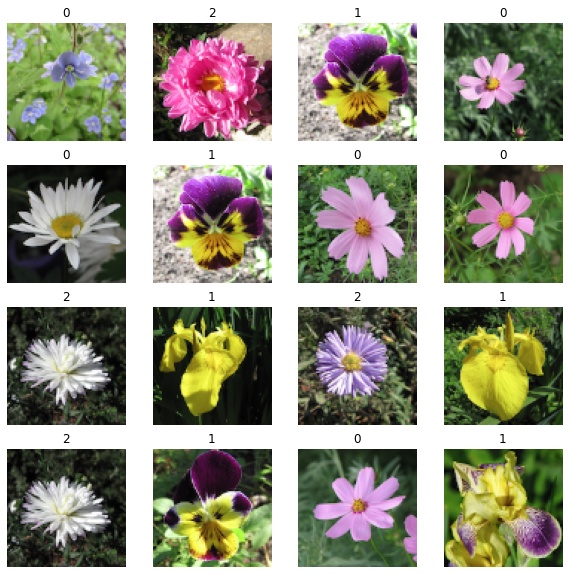

In [278]:
# view some images from the train_ds
# num,- = np.array(X_test).shape
num = len(Y_test)
plt.figure(figsize=(10, 10))
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  kk = int(random.randrange(num))
  RGB_img = cv2.cvtColor(X_test[kk], cv2.COLOR_BGR2RGB)
  plt.imshow(RGB_img)
  plt.title(Y_test[kk])
  plt.axis("off")

In [279]:
X_new = []
for XX in X_train:
  X_new.append(XX)
print(XX)
X_train = X_new.copy()

X_new = []
for XX in X_test:
  X_new.append(XX)

X_test = X_new.copy()

[[[ 18  28  22]
  [ 11  13  12]
  [ 10  12  12]
  ...
  [ 12  16  14]
  [ 11  14  12]
  [ 18  29  25]]

 [[ 10  11  10]
  [ 10  12  12]
  [ 10  10  10]
  ...
  [ 11  14  12]
  [ 15  20  18]
  [ 18  39  32]]

 [[ 10  11  11]
  [ 10  12  12]
  [ 11  12  12]
  ...
  [ 11  14  12]
  [ 16  27  23]
  [ 16  40  34]]

 ...

 [[ 11  77 115]
  [  7 116 150]
  [ 18 155 190]
  ...
  [ 52  90  77]
  [ 81 110  99]
  [ 77 108  95]]

 [[ 15  26  38]
  [ 28  52  71]
  [ 36  72  95]
  ...
  [ 26  50  44]
  [ 15  47  33]
  [ 27  56  41]]

 [[ 25  33  43]
  [ 43  61  78]
  [ 49  72  89]
  ...
  [ 22  55  43]
  [ 27  72  56]
  [ 24  73  52]]]


In [280]:
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

In [281]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))
# X_train = X_train.reshape(-1, Img_Size, Img_Size, 3) / 255.0
X_train = X_train /255.0
Y_train = Y_train.astype(np.int32)
#Y_train = Y_train.reshape(1,-1)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)
# X_test = X_test.reshape(-1, Img_Size, Img_Size, 3) / 255.0
X_test = X_test /255.0
Y_test = Y_test.astype(np.int32)
#Y_test = Y_test.reshape(1,-1)
Y_test = ynindicator(Y_test)

In [282]:
# the model will be a sequence of layers

model = Sequential()


# make the CNN
# model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 3), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=200))
model.add(Activation('tanh'))
model.add(Dropout(0.3))
model.add(Dense(units=100))
model.add(Activation('tanh'))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [283]:
# gives us back a <keras.callbacks.History object at 0x112e61a90>
r = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=20, batch_size=32)
print("Returned:", r)

Epoch 1/20
4/4 [==============================] - 4s 579ms/step - loss: 1.9898 - accuracy: 0.3722 - val_loss: 2.4298 - val_accuracy: 0.4074
Epoch 2/20
4/4 [==============================] - 2s 376ms/step - loss: 0.9779 - accuracy: 0.5864 - val_loss: 1.4746 - val_accuracy: 0.4444
Epoch 3/20
4/4 [==============================] - 2s 375ms/step - loss: 0.8425 - accuracy: 0.6407 - val_loss: 2.2604 - val_accuracy: 0.4074
Epoch 4/20
4/4 [==============================] - 2s 375ms/step - loss: 0.7146 - accuracy: 0.7343 - val_loss: 2.5506 - val_accuracy: 0.4074
Epoch 5/20
4/4 [==============================] - 2s 374ms/step - loss: 0.6055 - accuracy: 0.7101 - val_loss: 2.4367 - val_accuracy: 0.4074
Epoch 6/20
4/4 [==============================] - 2s 375ms/step - loss: 0.5331 - accuracy: 0.7894 - val_loss: 2.3385 - val_accuracy: 0.4074
Epoch 7/20
4/4 [==============================] - 2s 374ms/step - loss: 0.4688 - accuracy: 0.7999 - val_loss: 2.3097 - val_accuracy: 0.4074
Epoch 8/20
4/4 [====

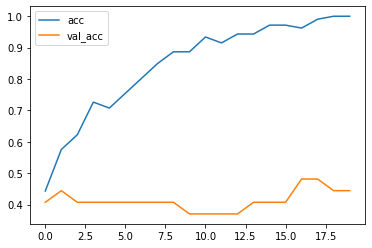

In [284]:
# plot some data
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

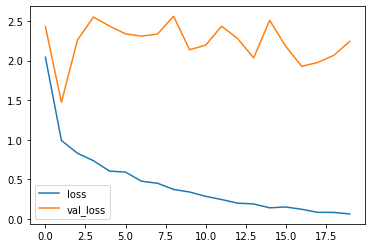

In [285]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()